### How probable is an $e^-$ $e^+$ annihilation process in a medium?

### Notes

Après être passé dans le matériau, le positron peut toujours avoir une énergie proche de son énergie initiale. La grandeur pour caractériser ça est la longueure de radiation (d'intéraction) , caractéristique du solide lui même.


**Première chose** : utiliser cette quantité là (voir PDG, wikipédia pas sur), en fonction des paramètres que l'on veut. ca peut donner une idée de quel type de solide on aura besoin. en fonction de ces paramèters là quelle est la longueur de la cible qu'on peut utiliser.

Ensuite, trouver une cible pour que l'énergie perdue via ce phénomène là, sur la longueure de la cible, soit moins que quelques pourcents (on décidera) pour que l'énergie soit la bonne pour faire de la création de pair de muons. 

Il faudra peut ête si besoin vérifier ce qu'il se passe dans la FODO si le positron a une petite variation (positive ou négative) par rapport à l'énergie de référence (off momentum dynamics, voir le cours d'accélérateurs). 

Il faut savoir qu'en général l'acceptance en énergie du ring n'excède pas le pourcent. Cas hyper optimiste, 10% max. inférieur au rapport à l'énergie de référence.

=> longueur max pour la cible. On peut commencer avec un solide. Ensuite avec liquide et gaz la formule peut changer (normalement pas une grosse différence entre liquide et solide). En fonction de la longueur et du matériau il y aura plus ou moins de probabilité de créer des muons.



**Deuxième chose**: le deuxième phénomène le plus probable est la création de pair. (le premier est la perte d'énergie par émission de photons). Donc annihilation va entrainer production de photons qui vont eux même pouvoir créer des pairs de muons, comme les photons ( énergie suffisante?) émis lors du bremsstrahlung.

prendre en compte les cascades électromagnétique qui sont créées par les leptons.
Une partie des annihilations ne vont pas forcément créer une autre paire electron positron mais muons plus moins.

L'idée c'est de prendre moins que la longueure de radiation pour noter cible pour choisir le pourcentage d'énergie perdue que l'on souhaite. Sur X mètres on peut ensuite prendre la section efficace de la production de paires de muons et voir la quantité de muons 


Faire un plot du nombre de muons produits par positrons rentrant en fonction du nombre atomique du solide (ou plutôt de la densité du solide? ) et de l'énergie des positrons arrivant.

### Radiation length

https://pdg.lbl.gov/2020/reviews/rpp2020-rev-passage-particles-matter.pdf reference PDG


High-energy electrons predominantly lose energy in matter by bremsstrahlung, and high-energy
photons by e+e− pair production. The characteristic amount of matter traversed for these related
interactions is called the radiation length X0, usually measured in g cm−2. It is the mean distance
over which a high-energy electron loses all but **1/e** of its energy by bremsstrahlung. It is also
the appropriate scale length for describing high-energy electromagnetic cascades. X0 has been
calculated and tabulated by Y.S. Tsai


$$
\frac{1}{X_{0}}=4 \alpha r_{e}^{2} \frac{N_{A}}{A}\left\{Z^{2}\left[L_{\mathrm{rad}}-f(Z)\right]+Z L_{\mathrm{rad}}^{\prime}\right\}
$$

For $A = 1 g mol^{−1}$, $4\alpha r^2 N_A/A = (716.408 g cm^{−2})^{−1}$. The function f(Z) is an infinite sum, but for elements up to uranium can be represented to 4-place accuracy by

$$
\begin{array}{r}
f(Z)=a^{2}\left[\left(1+a^{2}\right)^{-1}+0.20206 -0.0369 a^{2}+0.0083 a^{4}-0.002 a^{6}\right], \\
\text { where } a=\alpha Z .
\end{array}
$$

$L_{rad}$ and $L_{rad}^\prime$

$$
\begin{array}{cccc}
\hline \hline \text { Element } & Z & L_{\text {rad }} & L_{\text {rad }}^{\prime} \\
\hline \text { H } & 1 & 5.31 & 6.144 \\
\text { He } & 2 & 4.79 & 5.621 \\
\text { Li } & 3 & 4.74 & 5.805 \\
\text { Be } & 4 & 4.71 & 5.924 \\
\text { Others } & >4 & \ln \left(184.15 Z^{-1 / 3}\right) & \ln \left(1194 Z^{-2 / 3}\right) \\
\hline \hline
\end{array}
$$

If we want to get the real length in a certain material with density $\rho$, the radiation length calculated rearlier has to be divided by $\rho$. 

The function ruling the behaviour of the energy in function of the distance travelled is the following :

$$
E(x) = E_0e^{-\frac{x\rho}{X_0}}
$$

For a loss of $\alpha\cdot100$% we want $e^{-\frac{x \rho}{X_0}}=1-\alpha$ which yields 

$$x = -\frac{X_0}{\rho}\ln(1-\alpha)$$ 




In [82]:
%matplotlib notebook 

import numpy as np
import math as m
import matplotlib
import pandas
from mendeleev import get_table

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter, LogLocator

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 18})


plt.rcParams["figure.figsize"] = (9,6) # to ge bigger figures

In [88]:
# Constants needed for the calculations
r_e = 2.8179403227*10**(-15) # classical electron radius
K = 0.307075 #MeV mol−1 cm2
m_ec2 = 0.510998946131 # mass of the electron * c^2 MeV

q_p = 1; #charge of a positron in units of an electron charge
q_mu = 1; #charge of a muon in units of an electron charge

m_p = 0.511; # mass of the positron in MeV/c^2
m_mu = 0.10565*10**3; # mass of the muon in MeV/c^2

z_p = 1# charge number of positron
z_mu = 1# charge number of muon plus

E_p = 45*10**3 ; # energy of the positron in MeV
E_mu = 22*10**3 ; # energy of the muon in MeV
g_p = E_p/(m_p); # approximately 88063
g_mu = E_mu/(m_mu); # approximately 225
beta_p = np.sqrt(1-1/g_p**2)
beta_mu = np.sqrt(1-1/g_mu**2)

#### Radiation length

In [89]:
Z = np.linspace(1,92,92) #atomic numbers we can use with the previous formulae (Z from 5 to 92)
alpha = 1/137 # fine structure constant
N_A = 6.022140857*10**23 # avogadro's number
r_e = 2.8179403227*10**(-13) # classical electron radius in cm
ptable = get_table('elements')
col1 = ['atomic_weight']
col2 = ['density']
A = ptable[col1] # atomic mass of the absorber in g per cm^2
rho = ptable[col2] # Density at 295K at g/cm3	
A = A.to_numpy()
A = A[:92]
A = A.flatten()

rho = rho.to_numpy()
rho = rho[:92]
rho = rho.flatten()

# mean excitation energy for elements 1 up to 92 in eV , from: https://physics.nist.gov/PhysRefData/XrayMassCoef/tab1.html
I =[19.2, 41.8,40.0,63.7,76.0,78.0,82.0,95.0,115.0,137.0,149.0,156.0,166.0,173.0,173.0,180.0,174.0,188.0,190.0,191.0,216.0,233.0,245.0,257.0,272.0,286.0,297.0,311.0,322.0,330.0,334.0,350.0,347.0,348.0,343.0,352.0,363.0,366.0,379.0,393.0,417.0,424.0,428.0,441.0,449.0,470.0,470.0,469.0,488.0,488.0,487.0,485.0,491.0,482.0,488.0,491.0,501.0,523.0,535.0,546.0,560.0,574.0,580.0,591.0,614.0,628.0,650.0,658.0,674.0,684.0,694.0,705.0,718.0,727.0,736.0,746.0,757.0,790.0,790.0,800.0,810.0,823.0,823.0,830.0,825.0,794.0,827.0,826.0,841.0,847.0,878.0,890.0]
I = [i * 10**(-6) for i in I]

[63.03066149 94.2976723  82.74642948 65.17291405 52.66808887 42.68677258
 37.97878821 34.22832249 32.92173552 28.92442044 27.72896485 25.02493212
 24.00491941 21.81696328 21.19977877 19.48778637 19.27167726 19.54386354
 17.31055449 16.13921556 16.54116351 16.15920662 15.8382381  14.94061191
 14.63608863 13.83491194 13.61395691 12.67517527 12.8595539  12.42568629
 12.47075616 12.24959899 11.93711023 11.90686108 11.41943183 11.36909998
 11.02417054 10.75967841 10.40759367 10.1928686   9.92012907  9.80154124
  9.57882297  9.48019626  9.26320186  9.20205456  8.9678496   8.99346
  8.84689604  8.81640518  8.7230321   8.82459384  8.4783793   8.47946974
  8.30328101  8.30464654  8.13601399  7.95365752  7.75624629  7.70352174
  7.51310899  7.57161055  7.43634999  7.48146012  7.3548266   7.31841282
  7.2317453   7.14332211  7.03040189  7.02023703  6.92232488  6.88941634
  6.81644988  6.76146067  6.68879045  6.6762544   6.59318433  6.54211401
  6.45984113  6.43594163  6.41710242  6.3682787   6.28

<IPython.core.display.Javascript object>


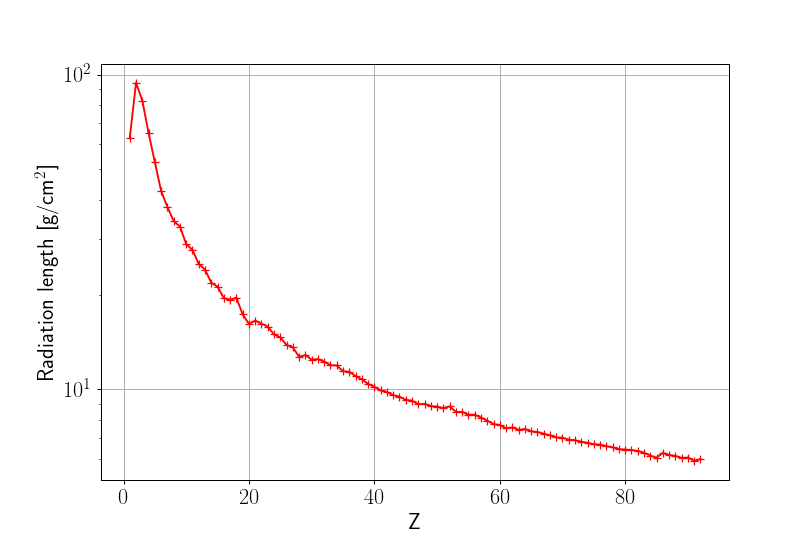

In [94]:
L_rad = np.log(184.15*Z**(-1/3))
L_rad_p =  np.log(1194*Z**(-2/3))
L_rad[0], L_rad[1], L_rad[2], L_rad[3] = 5.31, 4.79, 4.74, 4.71
L_rad_p[0], L_rad_p[1], L_rad_p[2], L_rad_p[3] =6.144, 5.621, 5.805,5.924

a = alpha*Z
f_Z = a**2*((1+a**2)**(-1) + 0.20206 - 0.0369*a**2 + 0.0083*a**4 -0.002*a**6)
X_0 =1/(4*alpha*r_e**2*N_A/A*(Z**2*(L_rad -f_Z) + Z*L_rad_p))
print(X_0)

fig = plt.figure(1)
plt.yscale('log')
plt.plot(Z,X_0,color ='r', marker = '+')
plt.xlabel(r'Z')
plt.ylabel(r'Radiation length [g/cm$^2$]')
plt.grid()

<IPython.core.display.Javascript object>


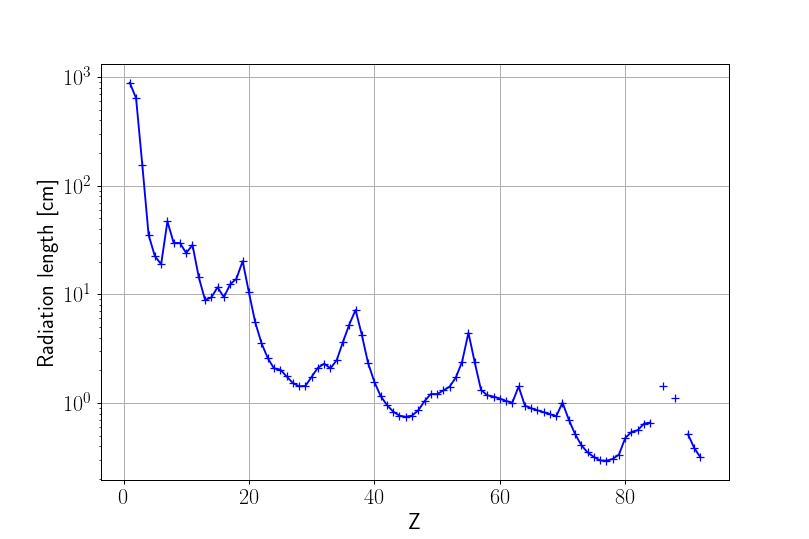

In [95]:
fig = plt.figure(2)
plt.yscale('log')
plt.plot(Z,X_0/rho,color ='b', marker = '+')
plt.xlabel(r'Z')
plt.ylabel(r'Radiation length [cm]')
plt.grid()

<IPython.core.display.Javascript object>


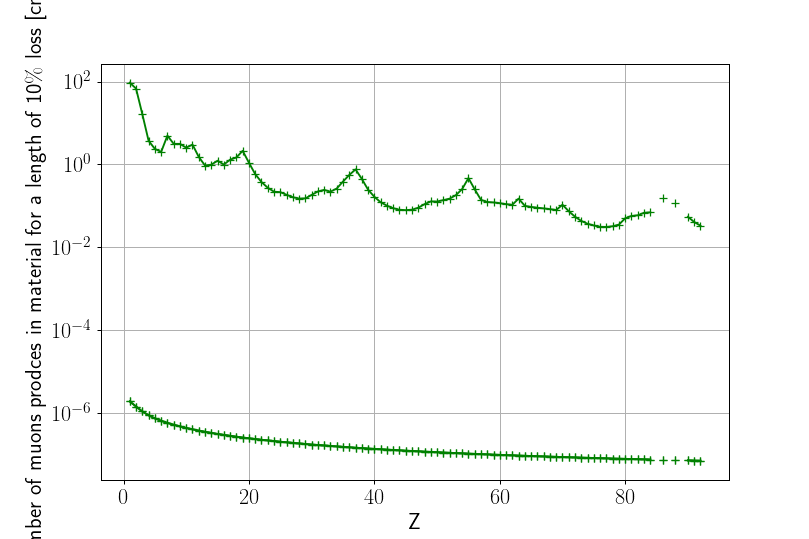

In [96]:
alpha = 0.1 # reduction by 10%

fig = plt.figure(3)
plt.yscale('log')
plt.plot(Z,-X_0/rho*np.log(1-alpha),color ='g', marker = '+')
plt.xlabel(r'Z')
plt.ylabel(r'Length of material for 10$\%$ loss [cm]')
plt.grid()

<IPython.core.display.Javascript object>


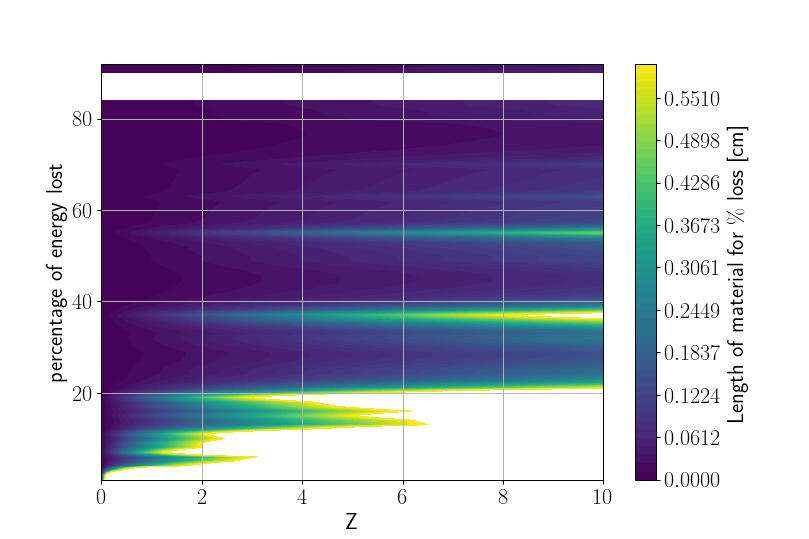

In [97]:
alpha = np.linspace(0,0.1,92) # reduction by 10%
lengths = np.zeros((92,92))
for i in range(92) :
    lengths[i] = -X_0/rho*np.log(1-alpha[i])

(x, y) = np.meshgrid(alpha*100, Z)
fig = plt.figure(4)
plt.contourf(x,y,np.transpose(lengths), levels = np.linspace(0,0.6))
plt.xlabel(r'Z')
plt.ylabel(r'percentage of energy lost')
plt.colorbar( label =r'Length of material for $\%$ loss [cm]')

plt.grid()

https://cds.cern.ch/record/603739/files/ab-2003-002.pdf

The annihilation of positrons and target electrons with the creation of muon pairs in the final state $\left(\mathrm{e}^{+} \mathrm{e}^{-} \rightarrow \mu^{+} \mu^{-}\right)$ may give an appreciable contribution to the total number of muons produced in high-energy electromagnetic cascades. The threshold positron energy in the laboratory system for this process with the target electron at rest is
$$
E_{\mathrm{th}}=2 m_{\mu}^{2} / m_{e}-m_{e} \approx 43.69 \mathrm{GeV}
$$
where $m_{\mu}$ and $m_{e}$ are the muon and electron masses, respectively. The total cross section of the process on the electron is [3]
$$
\sigma=\frac{\pi r_{\mu}^{2}}{3} \xi\left(1+\frac{\xi}{2}\right) \sqrt{1-\xi}
$$
where $r_{\mu}=r_{e} m_{e} / m_{\mu}$ is the classical muon radius, $\xi=E_{\mathrm{th}} / E,$ and $E$ is the total positron energy in the laboratory frame. In the above equation, approximations are made that utilize the inequality $m_{e}^{2} \ll m_{\mu}^{2}$.


To get the total section for a thickness of a selected material, we must multiply the number of electrons per atom, then by the number of atoms per unit volume (=$\rho N_A /A$), then by the volume travelled by the positron. 

<IPython.core.display.Javascript object>


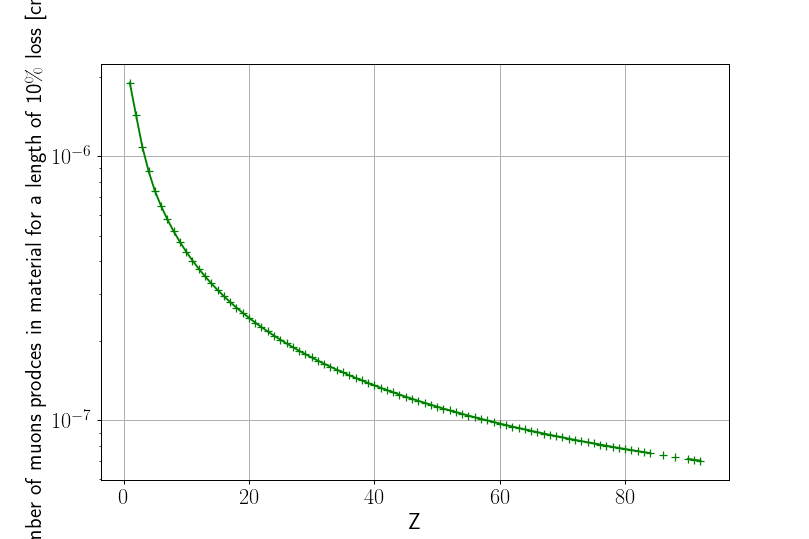

In [100]:
N_A = 6.02214085774*10**23 # Avogadro's number
chi = 43.69/45 
r_mu  = r_e*m_p/m_mu
section = np.pi*r_mu**2/3*chi*(1+chi/2)*np.sqrt(1-chi)

totalSection = section*Z*(rho*N_A/A)
alpha = 0.1 # reduction by 10%

fig = plt.figure(5)
plt.yscale('log')
plt.plot(Z,-X_0/rho*np.log(1-alpha)*totalSection,color ='g', marker = '+')
plt.xlabel(r'Z')
plt.ylabel(r'number of muons prodces in material for a length of 10$\%$ loss [cm]')
plt.grid()

